# Airbnb PRICE IN LISBON -  PROJECT

**About dataset:**

This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities (this case: Lisbon). Each listing is evaluated for various attributes such as _room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends_. Using spatial econometric methods, we analyse and identify the determinants of Airbnb prices across these cities. Our dataset includes information such as _realSum (the total price of the listing), room_type (private/shared/entire home/apt), host_is_superhost (boolean value indicating if host is a superhost or not), multi (indicator whether listing is for multiple rooms or not), biz (business indicator) , guest_satisfaction_overall (overall rating from guests camparing all listings offered by host ), bedrooms, dist (distance from city center) , lng & lat coordinates for location identification etc_. We hope that this data set offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!


__Dataset Column description:__

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

Source:

https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## Problem To Solve:
 1. Dig & interpret Insights
 2. Find some of features which the most impacted to target
 3. Do prediction model
 4. Do models comparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [59]:
!pip install yellowbrick

In [2]:
df1 = pd.read_csv('lisbon_weekdays.csv', index_col=0)
df2 = pd.read_csv('lisbon_weekends.csv', index_col=0)

In [3]:
df1 = df1.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)
df2 = df2.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [4]:
df1.loc[:, 'status'] = 'weekdays'
df2.loc[:, 'status'] = 'weekends'

In [5]:
df = df1.append(df2)
df = df.sample(frac=1).reset_index(drop= True)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,status
0,377.579737,Entire home/apt,False,False,6.0,False,0,0,9.0,89.0,3,2.106895,0.340300,-9.14303,38.73117,weekdays
1,183.864916,Entire home/apt,False,False,2.0,False,0,1,10.0,100.0,1,0.870080,0.561889,-9.12986,38.71407,weekends
2,228.893058,Entire home/apt,False,False,2.0,False,0,1,8.0,83.0,1,0.880957,0.516704,-9.12954,38.71310,weekdays
3,391.416510,Entire home/apt,False,False,4.0,True,0,1,10.0,93.0,2,0.796106,0.681145,-9.14876,38.71292,weekdays
4,205.675422,Entire home/apt,False,False,2.0,True,0,1,10.0,95.0,0,0.838270,0.562115,-9.13000,38.71200,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,304.174484,Private room,False,True,3.0,False,0,1,9.0,84.0,1,0.204930,0.106312,-9.14112,38.71094,weekends
5759,275.797373,Entire home/apt,False,False,5.0,False,1,0,9.0,95.0,2,0.902518,0.819319,-9.15000,38.71200,weekends
5760,326.219512,Entire home/apt,False,False,4.0,False,0,1,10.0,90.0,1,1.034025,0.365670,-9.12774,38.71215,weekends
5761,129.455910,Private room,False,True,2.0,False,0,1,9.0,84.0,1,1.359239,0.874184,-9.15432,38.70818,weekends


In [6]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,5763.000000,5763.000000,5763.000000,5763.000000,5763.00000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000
mean,238.210479,3.343398,0.239459,0.587541,9.37064,91.093875,1.272428,1.966893,0.711482,-9.143792,38.721298
std,108.973079,1.344214,0.426790,0.492320,0.92408,9.148114,0.728539,1.742681,0.920204,0.019122,0.015687
min,70.590994,2.000000,0.000000,0.000000,2.00000,20.000000,0.000000,0.043315,0.006158,-9.226340,38.693000
25%,160.178236,2.000000,0.000000,0.000000,9.00000,88.000000,1.000000,0.812614,0.287987,-9.151000,38.711080
50%,225.375235,3.000000,0.000000,1.000000,10.00000,93.000000,1.000000,1.387698,0.447592,-9.143000,38.716280
75%,286.350844,4.000000,0.000000,1.000000,10.00000,97.000000,2.000000,2.443833,0.673630,-9.132400,38.728000
max,1681.050657,6.000000,1.000000,1.000000,10.00000,100.000000,10.000000,9.574470,6.164745,-9.091940,38.792840


## EDA

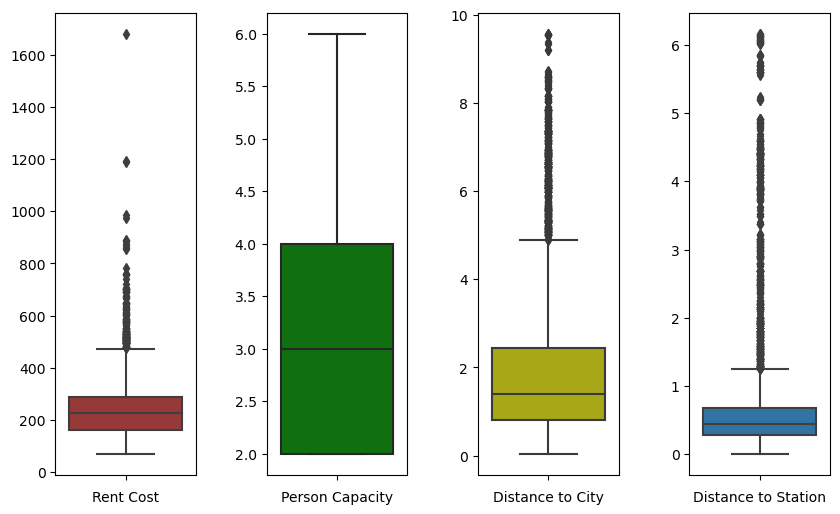

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 

sns.boxplot(data=df['realSum'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Rent Cost')

sns.boxplot(data=df['person_capacity'], ax=ax[1], color='g')
ax[1].set_xlabel('Person Capacity')

sns.boxplot(data=df['dist'], ax=ax[2], color='y')
ax[2].set_xlabel('Distance to City')

sns.boxplot(data=df['metro_dist'], ax=ax[3])
ax[3].set_xlabel('Distance to Station')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

 - Although outliers are detected, we can neglect it or eliminate only the extream one considering those are real value (based on variables)

In [62]:
px.density_mapbox (df, lat = "lat", lon = "lng", z = "realSum", radius = 2.5, center = {"lat": df.lat.mean (), "lon": df.lng.mean ()}, zoom = 10, mapbox_style = "stamen-terrain").show ()

 - As we can see at maps, most all of the airbnb location are close to coast/beach. It can be occured because Lisbon has many vacation destination which next to the beach. Also one of the beach in Lisbon, Praia dos Galapinhos, is often dubbed one of the best beaches in Lisbon, and even Europe, with tourists flocking to its shores
 - The vacation destination in Lisbon let alone next to the beach such as Belem Tower, Lisbon Oceanarium, and Cristo Rei Statue
 - Not all of the airbnb which next to the beach has expnsive price, it's still depend on the facility provided

In [64]:
fig = px.scatter(df, x= 'guest_satisfaction_overall', y = 'realSum', color = 'status')
fig.update_layout(title = "Price and Satisfaction")
fig.show()

 - Guest satisfaction not always corresponds to the expensive one. At the end, everything is always counted by worthiness

## Data Splitting to 2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     5763 non-null   float64
 1   room_type                   5763 non-null   object 
 2   room_shared                 5763 non-null   bool   
 3   room_private                5763 non-null   bool   
 4   person_capacity             5763 non-null   float64
 5   host_is_superhost           5763 non-null   bool   
 6   multi                       5763 non-null   int64  
 7   biz                         5763 non-null   int64  
 8   cleanliness_rating          5763 non-null   float64
 9   guest_satisfaction_overall  5763 non-null   float64
 10  bedrooms                    5763 non-null   int64  
 11  dist                        5763 non-null   float64
 12  metro_dist                  5763 non-null   float64
 13  lng                         5763 

In [9]:
category=['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'status']
category_noT = ['room_shared', 'room_private', 'host_is_superhost']
numeric=[i for i in df.columns if (i not in category)]

In [10]:
#Training & testing
df_train, df_test = train_test_split(df, test_size = 0.3, random_state=42)

In [11]:
df_train.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000,4034.000000
mean,239.656459,3.323996,0.240456,0.584284,9.374070,91.189886,1.262023,1.988486,0.707487,-9.143620,38.721543
std,110.961132,1.332195,0.427413,0.492906,0.918246,9.058295,0.707026,1.780092,0.928146,0.019246,0.016039
min,70.590994,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.043315,0.006158,-9.226340,38.693670
25%,160.705910,2.000000,0.000000,0.000000,9.000000,88.000000,1.000000,0.805676,0.282634,-9.150900,38.711110
50%,226.547842,3.000000,0.000000,1.000000,10.000000,93.000000,1.000000,1.394696,0.442538,-9.143000,38.716445
75%,286.819887,4.000000,0.000000,1.000000,10.000000,97.000000,2.000000,2.446024,0.670169,-9.132523,38.728000
max,1681.050657,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,9.574470,6.164745,-9.092230,38.792840


In [12]:
df_test.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000
mean,234.836803,3.388664,0.237131,0.595142,9.362637,90.869867,1.296703,1.916514,0.720802,-9.144195,38.720729
std,104.140545,1.371168,0.425447,0.491007,0.937770,9.353145,0.776086,1.651510,0.901601,0.018827,0.014822
min,70.590994,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.052258,0.006171,-9.224760,38.693000
25%,159.005629,2.000000,0.000000,0.000000,9.000000,88.000000,1.000000,0.818225,0.301054,-9.151210,38.711030
50%,223.030019,3.000000,0.000000,1.000000,10.000000,93.000000,1.000000,1.369588,0.462355,-9.143000,38.716000
75%,283.536585,4.000000,0.000000,1.000000,10.000000,97.000000,2.000000,2.433232,0.690106,-9.132110,38.728000
max,891.181989,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,9.342974,6.139620,-9.091940,38.790000


## Handling Outlier 

In [13]:
q = df_train['realSum'].quantile(0.9995)
df_train = df_train[df_train['realSum']<q]
df_train.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.00000,4031.000000,4031.000000,4031.000000,4031.000000
mean,238.827034,3.324485,0.240387,0.584718,9.373605,91.193252,1.26197,1.985911,0.707393,-9.143621,38.721518
std,106.566721,1.332321,0.427372,0.492832,0.918429,9.046207,0.70717,1.778207,0.928464,0.019232,0.016020
min,70.590994,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.043315,0.006158,-9.226340,38.693670
25%,160.647280,2.000000,0.000000,0.000000,9.000000,88.000000,1.00000,0.804659,0.282512,-9.150895,38.711100
50%,226.547842,3.000000,0.000000,1.000000,10.000000,93.000000,1.00000,1.392528,0.441896,-9.143000,38.716430
75%,286.819887,4.000000,0.000000,1.000000,10.000000,97.000000,2.00000,2.444341,0.669110,-9.132525,38.728000
max,987.101313,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,9.574470,6.164745,-9.092230,38.792840


## Data Preprocessing (Split 2)

In [14]:
variables = df_train[numeric]
vif_df_train = pd.DataFrame(variables.columns.values, columns = ['Feature'])
vif_df_train['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_df_train

,Feature,VIF
0,realSum,9.595659
1,person_capacity,13.750426
2,multi,2.418842
3,biz,4.548787
4,cleanliness_rating,212.068012
5,guest_satisfaction_overall,210.527377
6,bedrooms,6.315911
7,dist,4.394440
8,metro_dist,5.995993
9,lng,524870.384757


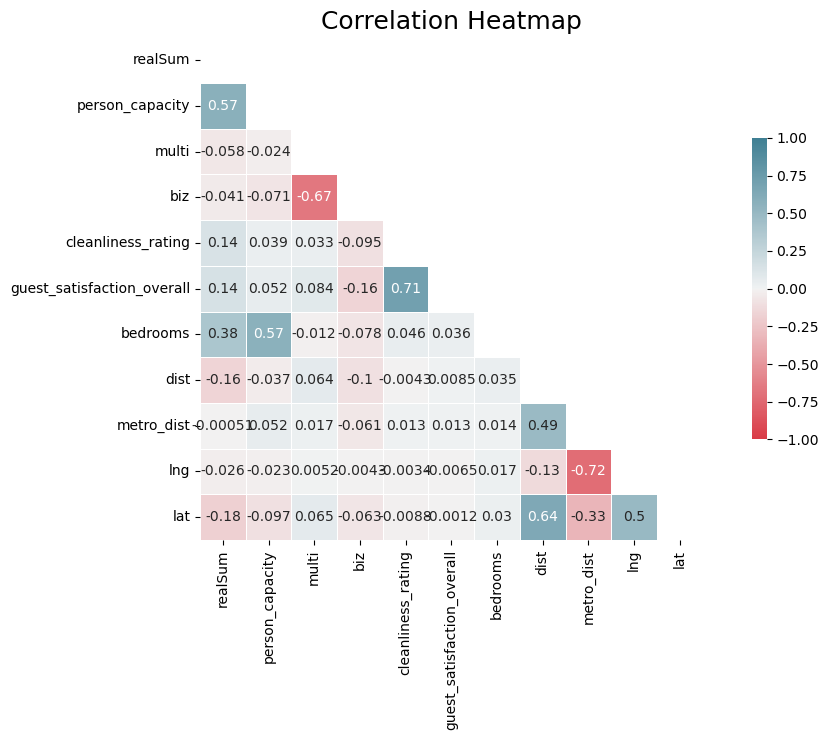

In [15]:
plt.figure(figsize = (10.5,7.5), tight_layout = True)
plt.title('Correlation Heatmap', fontsize = 18)
corr = df_train[numeric].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap = cmap, 
            mask = mask, 
            center = 0, 
            vmax = 1, 
            vmin = -1, 
            square = True, 
            linewidths = 0.5, 
            cbar_kws={"shrink": 0.6},
            annot = True)
plt.show()

In [16]:
label_dict={}
for col in category_noT:
    label=preprocessing.LabelEncoder()
    label.fit(df_train[col])
    label_dict[col]=label
    df_train[col]=label.transform(df_train[col])
label_dict

{'room_shared': LabelEncoder(),
 'room_private': LabelEncoder(),
 'host_is_superhost': LabelEncoder()}

In [17]:
encoding = {'room_type' : {'Shared room' : 1, 'Private room' : 2, 'Entire home/apt' : 3}}
df_train.replace(encoding, inplace=True)

In [18]:
df_train['person_capacity'] = df_train['person_capacity'].astype(int)

In [19]:
df_train['dist'] = round(df_train['dist'], ndigits=2)

In [20]:
df_train['metro_dist'] = round(df_train['metro_dist'], ndigits=2)

In [21]:
df_train = df_train.drop(['cleanliness_rating', 'guest_satisfaction_overall', 'lng', 'lat'], axis = 1)

In [22]:
df_train['realSum'] = np.log(df_train['realSum'])
df_train

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,status
5465,5.354407,3,0,0,4,0,0,0,1,1.02,0.60,weekdays
4438,4.989143,2,0,1,2,0,0,0,1,1.07,0.68,weekends
2271,6.149694,3,0,0,6,1,1,0,3,0.75,0.65,weekends
3285,5.126262,2,0,1,2,0,0,1,1,2.35,0.28,weekdays
5665,4.613578,2,0,1,2,1,0,0,1,2.32,0.60,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,5.769434,3,0,0,4,0,1,0,1,0.72,0.52,weekends
5191,5.574441,3,0,0,3,1,0,1,0,0.57,0.52,weekends
5226,5.468488,3,0,0,3,0,0,0,2,2.30,0.40,weekends
5390,5.379586,2,0,1,2,0,0,1,1,3.21,0.28,weekdays


In [23]:
label_dict={}
for col in category_noT:
    label=preprocessing.LabelEncoder()
    label.fit(df_test[col])
    label_dict[col]=label
    df_test[col]=label.transform(df_test[col])
label_dict

{'room_shared': LabelEncoder(),
 'room_private': LabelEncoder(),
 'host_is_superhost': LabelEncoder()}

In [24]:
encoding = {'room_type' : {'Shared room' : 1, 'Private room' : 2, 'Entire home/apt' : 3}}
df_test.replace(encoding, inplace=True)

In [25]:
df_test['person_capacity'] = df_test['person_capacity'].astype(int)

In [26]:
df_test['dist'] = round(df_test['dist'], ndigits=2)

In [27]:
df_test['metro_dist'] = round(df_test['metro_dist'], ndigits=2)

In [28]:
df_test = df_test.drop(['cleanliness_rating', 'guest_satisfaction_overall', 'lng', 'lat'], axis = 1)

In [29]:
df_test['realSum'] = np.log(df_test['realSum'])
df_test

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,status
4073,6.154189,3,0,0,2,0,0,0,1,0.34,0.17,weekends
4574,5.503477,3,0,0,4,0,1,0,1,0.99,0.40,weekends
2187,5.533582,3,0,0,5,0,1,0,2,3.76,0.44,weekdays
3733,4.989143,2,0,1,2,0,0,1,1,2.53,0.38,weekends
4649,5.780355,3,0,0,6,0,0,1,2,0.56,0.52,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...
3885,5.051082,2,0,1,2,0,0,1,1,1.92,1.24,weekends
368,5.255431,3,0,0,2,0,0,1,1,2.16,0.62,weekdays
5163,4.611249,1,1,0,4,0,0,1,1,1.60,0.21,weekdays
1151,5.482240,3,0,0,3,0,0,0,1,1.88,1.27,weekdays


In [30]:
x_train1 = df_train.drop('status', axis=1)
y_train1 = df_train['status']
x_test1 = df_test.drop('status', axis=1)
y_test1 = df_test['status']

## Data Preprocessing (split 4)

In [31]:
df_copy = df.copy()

In [32]:
label_dict={}
for col in category_noT:
    label=preprocessing.LabelEncoder()
    label.fit(df_copy[col])
    label_dict[col]=label
    df_copy[col]=label.transform(df_copy[col])
label_dict

{'room_shared': LabelEncoder(),
 'room_private': LabelEncoder(),
 'host_is_superhost': LabelEncoder()}

In [33]:
encoding = {'room_type' : {'Shared room' : 1, 'Private room' : 2, 'Entire home/apt' : 3}}
df_copy.replace(encoding, inplace=True)

In [34]:
df_copy['person_capacity'] = df_copy['person_capacity'].astype(int)

In [35]:
df_copy['dist'] = round(df_copy['dist'], ndigits=2)

In [36]:
df_copy['metro_dist'] = round(df_copy['metro_dist'], ndigits=2)

In [37]:
df_copy = df_copy.drop(['cleanliness_rating', 'guest_satisfaction_overall', 'lng', 'lat'], axis = 1)

In [38]:
df_copy['realSum'] = np.log(df_copy['realSum'])
df_copy

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,dist,metro_dist,status
0,5.933782,3,0,0,6,0,0,0,3,2.11,0.34,weekdays
1,5.214201,3,0,0,2,0,0,1,1,0.87,0.56,weekends
2,5.433255,3,0,0,2,0,0,1,1,0.88,0.52,weekdays
3,5.969772,3,0,0,4,1,0,1,2,0.80,0.68,weekdays
4,5.326299,3,0,0,2,1,0,1,0,0.84,0.56,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...
5758,5.717601,2,0,1,3,0,0,1,1,0.20,0.11,weekends
5759,5.619666,3,0,0,5,0,1,0,2,0.90,0.82,weekends
5760,5.787571,3,0,0,4,0,0,1,1,1.03,0.37,weekends
5761,4.863340,2,0,1,2,0,0,1,1,1.36,0.87,weekends


In [39]:
x = df_copy.drop('status', axis=1)
y = df_copy['status']

In [40]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Model 1

In [41]:
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(x_train1, y_train1)
classifier1.fit(x_train2, y_train2)

LogisticRegression(random_state=0)

In [42]:
y_pred1 = classifier1.predict(x_test1)
y_pred2 = classifier1.predict(x_test2)

In [43]:
print(confusion_matrix(y_test1,y_pred1))
print(confusion_matrix(y_test2,y_pred2))

[[397 474]
 [409 449]]
[[397 474]
 [409 449]]


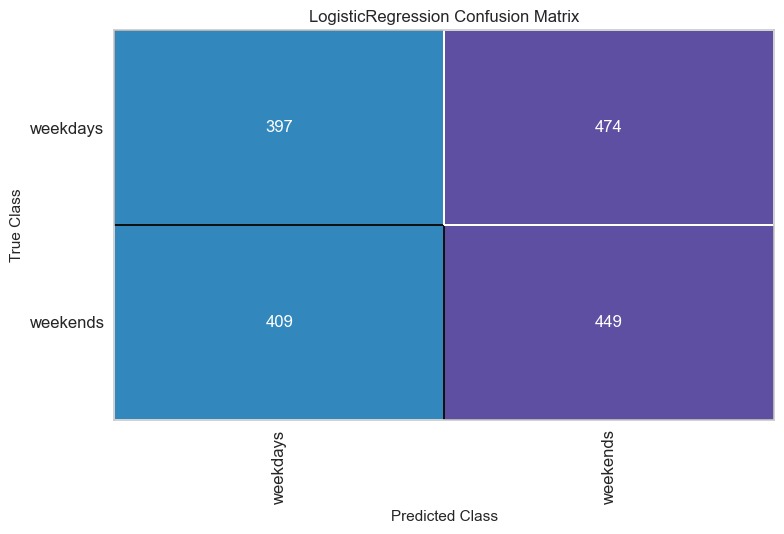

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [60]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(classifier1, cmap='Spectral')

cm.fit(x_train1, y_train1)

cm.score(x_test1, y_test1)

cm.show()

In [44]:
print(classification_report(y_test1,y_pred1))
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

    weekdays       0.49      0.46      0.47       871
    weekends       0.49      0.52      0.50       858

    accuracy                           0.49      1729
   macro avg       0.49      0.49      0.49      1729
weighted avg       0.49      0.49      0.49      1729

              precision    recall  f1-score   support

    weekdays       0.49      0.46      0.47       871
    weekends       0.49      0.52      0.50       858

    accuracy                           0.49      1729
   macro avg       0.49      0.49      0.49      1729
weighted avg       0.49      0.49      0.49      1729



## Model 2

In [45]:
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(x_train1, y_train1)
classifier2.fit(x_train2, y_train2)

SVC(random_state=0)

In [46]:
y_pred1 = classifier1.predict(x_test1)
y_pred2 = classifier2.predict(x_test2)

In [47]:
print(confusion_matrix(y_test1,y_pred1))
print(confusion_matrix(y_test2,y_pred2))

[[397 474]
 [409 449]]
[[130 741]
 [129 729]]


In [48]:
print(classification_report(y_test1,y_pred1))
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

    weekdays       0.49      0.46      0.47       871
    weekends       0.49      0.52      0.50       858

    accuracy                           0.49      1729
   macro avg       0.49      0.49      0.49      1729
weighted avg       0.49      0.49      0.49      1729

              precision    recall  f1-score   support

    weekdays       0.50      0.15      0.23       871
    weekends       0.50      0.85      0.63       858

    accuracy                           0.50      1729
   macro avg       0.50      0.50      0.43      1729
weighted avg       0.50      0.50      0.43      1729



## Model 3

In [49]:
classifier3 = GaussianNB()
classifier3.fit(x_train1, y_train1)
classifier3.fit(x_train2, y_train2)

GaussianNB()

In [50]:
y_pred1 = classifier3.predict(x_test1)
y_pred2 = classifier3.predict(x_test2)

In [51]:
print(confusion_matrix(y_test1,y_pred1))
print(confusion_matrix(y_test2,y_pred2))

[[593 278]
 [592 266]]
[[593 278]
 [592 266]]


In [52]:
print(classification_report(y_test1,y_pred1))
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

    weekdays       0.50      0.68      0.58       871
    weekends       0.49      0.31      0.38       858

    accuracy                           0.50      1729
   macro avg       0.49      0.50      0.48      1729
weighted avg       0.49      0.50      0.48      1729

              precision    recall  f1-score   support

    weekdays       0.50      0.68      0.58       871
    weekends       0.49      0.31      0.38       858

    accuracy                           0.50      1729
   macro avg       0.49      0.50      0.48      1729
weighted avg       0.49      0.50      0.48      1729



## Model 4

In [53]:
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(x_train1, y_train1)
classifier4.fit(x_train2, y_train2)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [54]:
y_pred1 = classifier4.predict(x_test1)
y_pred2 = classifier4.predict(x_test2)

In [55]:
print(confusion_matrix(y_test1,y_pred1))
print(confusion_matrix(y_test2,y_pred2))

[[399 472]
 [577 281]]
[[399 472]
 [577 281]]


In [56]:
print(classification_report(y_test1,y_pred1))
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

    weekdays       0.41      0.46      0.43       871
    weekends       0.37      0.33      0.35       858

    accuracy                           0.39      1729
   macro avg       0.39      0.39      0.39      1729
weighted avg       0.39      0.39      0.39      1729

              precision    recall  f1-score   support

    weekdays       0.41      0.46      0.43       871
    weekends       0.37      0.33      0.35       858

    accuracy                           0.39      1729
   macro avg       0.39      0.39      0.39      1729
weighted avg       0.39      0.39      0.39      1729



## Conclusion

In [68]:
concl = pd.DataFrame({'Model':['Logit Regression', 'SVC', 'Naive Bayes', 'Random Forest'],
                      'W/O Preprocessing': [0.52, 0.50, 0.48, 0.39],
                      'W/ Preprocessing' : [0.52, 0.52, 0.48, 0.39]})
concl.index = np.arange(1, len(concl) + 1)
concl

,Model,W/O Preprocessing,W/ Preprocessing
1,Logit Regression,0.52,0.52
2,SVC,0.50,0.52
3,Naive Bayes,0.48,0.48
4,Random Forest,0.39,0.39


In [66]:
fig = px.histogram(concl, x="Model", y=["W/O Preprocessing", 'W/ Preprocessing'], barmode='group', height=400, title='MODEL COMPARATION')
fig.show()

 - Dari keempat model yang digunakan, dapat disimpulkan bahwa untuk datase yang digunakan saat ini tidak ada perbedaan signifikan kecuali pada model Random Forest
 - Untuk dataset ini, adanya atau tidak adanya preprocessing tidak banyak berpengaruh, bahkan bisa dianggap tidak ada

## Feature Importance

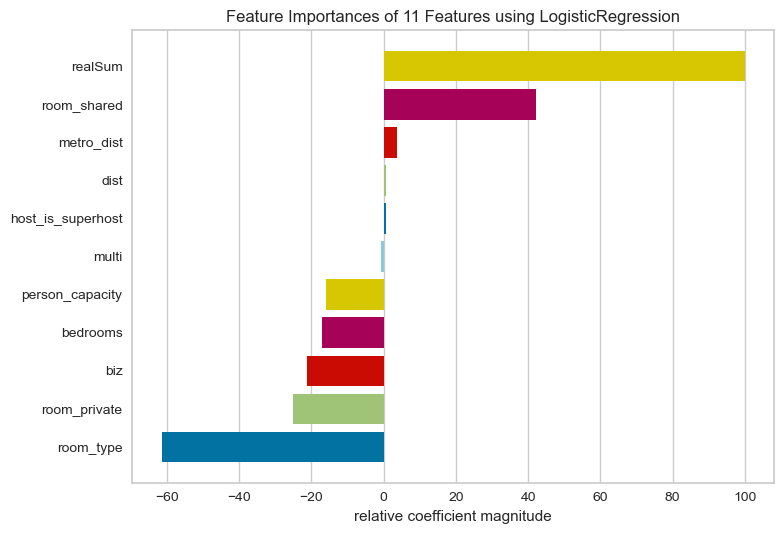

<AxesSubplot:title={'center':'Feature Importances of 11 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [65]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(classifier1)
viz.fit(x_train1, y_train1)
viz.show()

 - 3 variabel yang paling berpengaruh adalah 'realSum', 'room_type', dan 'room_shared'